# <a name="0">Machine Learning Model using tabular data</a>

## Using K Nearest Neighbors (KNN)

Build a K Nearest Neighbors Classifier to predict the __label__ field (substitute or not substitute) of the Amazon product substitute dataset.

### Project Problem: Product Substitute Prediction

__Problem Definition__:
Given a pair of products, (A, B), we say that B is a "substitute" for A if a customer would buy B in place of A -- say, if A were out of stock.

The goal of this project is to predict a substitute relationship between pairs of products.

__Datasets and Files:__


* __training.csv__: Training data with product pair features and corresponding labels:
> - `ID:` ID of the record
> - `label:` Tells whether the key and candidate products are substitutes (1) or not (0).
> - `key_asin ...:` Key product ASIN features 
> - `cand_asin ...:` Candidate product ASIN features 


* __public_test_features.csv__: Test data with product pairs features __without__ labels:
> - `ID:` ID of the record
> - `key_asin ...:` Key product ASIN features 
> - `cand_asin ...:` Candidate product ASIN features 


* __metadata-dataset.xlsx__: Provides detailed information about all key_ and cand_ columns in the training and test sets. 

## <a name="1">Read the datasets</a> 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../../data/final_project/training.csv')
test_data = pd.read_csv('../../data/final_project/public_test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)

The shape of the training dataset is: (36803, 228)
The shape of the test dataset is: (15774, 227)


## <a name="2">Data Processing</a>

We look at number of rows, columns, and some simple statistics of the datasets.

In [2]:
training_data.head()

,ID,label,key_Region Id,key_MarketPlace Id,key_ASIN,key_Binding Code,key_binding_description,key_brand_code,key_case_pack_quantity,key_classification_code,...,cand_pkg_weight,cand_pkg_weight_uom,cand_pkg_width,cand_release_date_embargo_level,cand_dw_creation_date,cand_dw_last_updated,cand_is_deleted,cand_last_updated,cand_version,cand_external_testing_certification
0,34016,0,1,1,B00YCZ6IKA,kitchen,Kitchen,NICLW,NaN,base_product,...,0.529104,pounds,5.118110,NaN,18-Apr-13,14-Oct-17,N,13-Oct-17,2867,NaN
1,3581,0,1,1,B00U25WT7A,office_product,Office Product,NaN,NaN,base_product,...,0.100000,pounds,4.500000,NaN,19-May-16,21-Mar-18,N,20-Mar-18,65,NaN
2,36025,1,1,1,B011BZ3GXU,consumer_electronics,Electronics,NaN,NaN,base_product,...,0.654773,pounds,3.937008,NaN,10-Dec-15,16-Feb-18,N,15-Feb-18,1532,NaN
3,42061,1,1,1,B0089XDG3I,pc,Personal Computers,NaN,NaN,base_product,...,3.549442,pounds,10.314961,NaN,19-Oct-12,15-Feb-18,N,14-Feb-18,13964,NaN
4,14628,1,1,1,B014UTSBZW,miscellaneous,Misc.,ZUKC7,1.0,base_product,...,0.396832,pounds,5.196850,NaN,26-Jul-12,9-Mar-18,N,9-Mar-18,1253,NaN


In [3]:
test_data.head()

,ID,key_Region Id,key_MarketPlace Id,key_ASIN,key_Binding Code,key_binding_description,key_brand_code,key_case_pack_quantity,key_classification_code,key_classification_description,...,cand_pkg_weight,cand_pkg_weight_uom,cand_pkg_width,cand_release_date_embargo_level,cand_dw_creation_date,cand_dw_last_updated,cand_is_deleted,cand_last_updated,cand_version,cand_external_testing_certification
0,35057,1,1,B0096M8VR2,pc,Personal Computers,NaN,1.0,base_product,Base Product,...,0.925932,pounds,5.826772,NaN,10-Apr-13,5-Jul-16,N,4-Jul-16,699,NaN
1,41573,1,1,B00EAQJCWW,kitchen,Kitchen,BUNN9,2.0,base_product,Base Product,...,NaN,NaN,NaN,NaN,17-Mar-16,17-Mar-16,N,17-Mar-16,2,NaN
2,44029,1,1,B013P93YOQ,toy,Toy,NaN,NaN,base_product,Base Product,...,NaN,NaN,NaN,NaN,23-Dec-15,2-Dec-17,N,2-Dec-17,17,NaN
3,6462,1,1,B00SKJPKGW,wireless_phone_accessory,Wireless Phone Accessory,PIQ22,1.0,base_product,Base Product,...,6.250000,pounds,9.700000,NaN,22-Jan-15,18-Jan-17,N,18-Jan-17,25351,NaN
4,17533,1,1,B001DCEKXM,sports,Sports,SUUNR,1.0,base_product,Base Product,...,0.176368,pounds,3.228346,NaN,4-Jan-11,16-Nov-17,N,16-Nov-17,7424,NaN


In [6]:
training_data.info()
training_data.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36803 entries, 0 to 36802
Columns: 228 entries, ID to cand_external_testing_certification
dtypes: float64(90), int64(12), object(126)
memory usage: 64.0+ MB


,ID,label,key_Region Id,key_MarketPlace Id,key_case_pack_quantity,key_country_of_origin,key_discontinued_date,key_ean,key_excluded_direct_browse_node_id,key_fedas_id,...,cand_recall_notice_receive_date,cand_unit_count,cand_upc,cand_variation_theme_id,cand_video_game_region,cand_pkg_height,cand_pkg_length,cand_pkg_weight,cand_pkg_width,cand_version
count,36803.000000,36803.000000,36803.0,36803.0,16508.000000,0.0,0.0,3.338900e+04,1.013200e+04,33.0,...,0.0,4751.000000,2.710200e+04,14347.000000,14.000000,29405.000000,29405.000000,29135.000000,29405.000000,36803.000000
mean,26341.493438,0.505095,1.0,1.0,9.828326,NaN,NaN,1.704312e+12,1.931567e+09,100954.0,...,NaN,46.670352,6.207103e+11,36.932808,1.428571,3.497030,12.478694,5.806474,7.670509,11493.830014
std,15159.339391,0.499981,0.0,0.0,72.961235,NaN,NaN,2.406607e+12,3.543757e+09,0.0,...,NaN,746.862227,2.750663e+11,91.314273,0.851631,3.773179,11.434224,27.061422,5.980064,75595.969332
min,1.000000,0.000000,1.0,1.0,0.000000,NaN,NaN,1.427901e+07,1.722820e+05,100954.0,...,NaN,0.000000,5.012000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,13250.500000,0.000000,1.0,1.0,1.000000,NaN,NaN,6.464370e+11,1.064954e+06,100954.0,...,NaN,1.000000,6.134230e+11,2.000000,1.000000,1.100000,6.300000,0.250000,3.818898,53.000000
50%,26318.000000,1.000000,1.0,1.0,1.000000,NaN,NaN,7.571830e+11,1.657930e+08,100954.0,...,NaN,1.000000,7.157180e+11,8.000000,1.000000,2.400000,9.200000,0.750000,5.905512,195.000000
75%,39455.500000,1.000000,1.0,1.0,6.000000,NaN,NaN,8.809600e+11,2.445458e+09,100954.0,...,NaN,12.000000,7.938420e+11,24.000000,1.000000,4.330709,14.100000,2.802126,9.900000,1175.000000
max,52576.000000,1.000000,1.0,1.0,1700.000000,NaN,NaN,9.825480e+12,1.634073e+10,100954.0,...,NaN,50000.000000,9.999980e+11,1437.000000,3.000000,74.000000,202.400000,2322.000000,97.000000,635453.000000


In [7]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15774 entries, 0 to 15773
Columns: 227 entries, ID to cand_external_testing_certification
dtypes: float64(88), int64(11), object(128)
memory usage: 27.3+ MB


,ID,key_Region Id,key_MarketPlace Id,key_case_pack_quantity,key_country_of_origin,key_discontinued_date,key_ean,key_excluded_direct_browse_node_id,key_fedas_id,key_fma_qualified_price_max,...,cand_recall_notice_receive_date,cand_unit_count,cand_upc,cand_variation_theme_id,cand_video_game_region,cand_pkg_height,cand_pkg_length,cand_pkg_weight,cand_pkg_width,cand_version
count,15774.000000,15774.0,15774.0,7105.000000,0.0,0.0,1.433900e+04,4.304000e+03,7.0,14725.000000,...,0.0,2099.000000,1.160000e+04,6122.000000,2.0,12534.000000,12534.000000,12440.000000,12534.000000,15774.00000
mean,26163.192152,1.0,1.0,9.655313,NaN,NaN,1.694087e+12,1.857555e+09,100954.0,117.616536,...,NaN,31.615050,6.190093e+11,35.154851,1.0,3.497150,12.503518,5.979049,7.702780,11802.00374
std,15220.590579,0.0,0.0,68.971566,NaN,NaN,2.382636e+12,3.462478e+09,0.0,273.619950,...,NaN,155.009165,2.751171e+11,81.875503,0.0,3.725023,11.871577,26.732522,6.110312,76503.09307
min,0.000000,1.0,1.0,0.000000,NaN,NaN,1.427901e+07,1.722820e+05,100954.0,10.170000,...,NaN,-9.000000,2.096700e+05,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.00000
25%,12847.750000,1.0,1.0,1.000000,NaN,NaN,6.464370e+11,1.064954e+06,100954.0,25.410000,...,NaN,1.000000,6.134690e+11,2.000000,1.0,1.102362,6.400000,0.250000,3.860000,54.00000
50%,26224.000000,1.0,1.0,1.000000,NaN,NaN,7.551710e+11,1.657930e+08,100954.0,40.790000,...,NaN,1.000000,7.148340e+11,8.000000,1.0,2.400000,9.291339,0.800000,6.000000,201.00000
75%,39360.750000,1.0,1.0,6.000000,NaN,NaN,8.618530e+11,2.407760e+09,100954.0,102.320000,...,NaN,12.000000,7.936310e+11,24.000000,1.0,4.400000,14.094488,2.750000,9.900000,1175.00000
max,52571.000000,1.0,1.0,1700.000000,NaN,NaN,9.825480e+12,1.634073e+10,100954.0,4398.900000,...,NaN,5000.000000,9.999990e+11,1364.000000,1.0,39.000000,268.110236,1107.000000,109.000000,629101.00000


Matplotlib is building the font cache; this may take a moment.


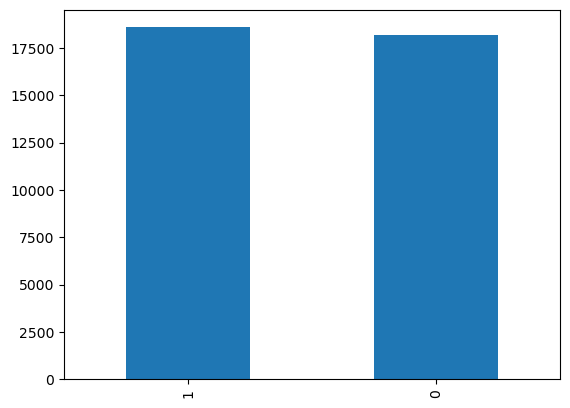

In [9]:
import matplotlib.pyplot as plt

training_data['label'].value_counts().plot.bar()
plt.show()

In [10]:
import numpy as np                    
np.set_printoptions(threshold=np.inf) # use this for datasets with more columns, to print all columns

# This prints the column labels of the dataframe
print('All dataset columns:')
print(training_data.columns.values)

# This prints the column labels of the features identified as numerical
print('Numerical columns:')
print(training_data.select_dtypes(include=np.number).columns.values)

# This prints the column labels of the features identified as categorical
print('Categorical columns:')
print(training_data.select_dtypes(include='object').columns.values)

All dataset columns:
['ID' 'label' 'key_Region Id' 'key_MarketPlace Id' 'key_ASIN'
 'key_Binding Code' 'key_binding_description' 'key_brand_code'
 'key_case_pack_quantity' 'key_classification_code'
 'key_classification_description' 'key_color_map' 'key_country_of_origin'
 'key_cpsia_cautionary_statement' 'key_creation_date' 'key_currency_code'
 'key_customer_return_method' 'key_customer_return_policy'
 'key_delivery_option' 'key_discontinued_date' 'key_ean'
 'key_esrb_age_rating' 'key_esrb_descriptors'
 'key_excluded_direct_browse_node_id' 'key_fedas_id'
 'key_fma_qualified_price_max' 'key_fma_override' 'key_Product Group Code'
 'key_Product Group Description' 'key_has_ean' 'key_has_online_play'
 'key_has_platform' 'key_has_recommended_browse_nodes' 'key_has_upc'
 'key_inner_package_type' 'key_is_adult_product' 'key_is_advantage'
 'key_is_certified_organic' 'key_is_conveyable' 'key_is_discontinued'
 'key_is_manufacture_on_demand' 'key_is_phone_upgradeable'
 'key_Is Sortable' 'key_is_su

### <a name="22">Select features to build the model</a> 

In this project I am using only a few of the numerical features for both key_ and cand_ ASINs: __item_package_quantity__, __item_height__, __item_width__, __item_length__, __item_weight__, __pkg_height__, __pkg_width__, __pkg_length__, __pkg_weight__. 


In [8]:
# Grab model features/inputs and target/output
numerical_features = ["key_item_package_quantity", 
                      "key_item_height", "key_item_width", "key_item_length", "key_item_weight", 
                      "key_pkg_height", "key_pkg_width", "key_pkg_length", "key_pkg_weight",
                      "cand_item_package_quantity", 
                      "cand_item_height", "cand_item_width", "cand_item_length", "cand_item_weight", 
                      "cand_pkg_height", "cand_pkg_width", "cand_pkg_length", "cand_pkg_weight"]

model_features = numerical_features
model_target = 'label'

### <a name="23">Train - Validation Datasets</a>

We already have training and test datasets, however the test dataset is missing the labels - the goal of the project is to predict these labels and submit them to leaderboard to get scored. 


In [11]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(training_data, test_size=0.15, shuffle=True, random_state=23)

# Print the shapes of the Train - Validation - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape, test_data.shape)

Train - Validation - Test Datasets shapes:  (31282, 228) (5521, 228) (15774, 227)


### <a name="24">Data processing with Pipeline</a>


Build a pipeline  to impute the missing values and scale the numerical features, and finally train a K Nearest Neighbors Classifier on the imputed and scaled dataset. 


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

## <a name="3">Train and Tune a Classifier</a>

Train and tune the K Nearest Neighbors Classifier pipeline. 

In [13]:
# Get train data to train the classifier
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the classifier to the train data
# Train data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to fit the model
classifier.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[11810  3677]
 [ 2983 12812]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     15487
           1       0.78      0.81      0.79     15795

    accuracy                           0.79     31282
   macro avg       0.79      0.79      0.79     31282
weighted avg       0.79      0.79      0.79     31282

Train accuracy: 0.7870980116360846


In [15]:
# Get validation data to validate the classifier
X_val = val_data[model_features]
y_val = val_data[model_target]

# Use the fitted model to make predictions on the validation dataset
# Validation data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
val_predictions = classifier.predict(X_val)

print('Model performance on the validation set:')
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Validation accuracy:", accuracy_score(y_val, val_predictions))

Model performance on the validation set:
[[1574 1153]
 [ 983 1811]]
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      2727
           1       0.61      0.65      0.63      2794

    accuracy                           0.61      5521
   macro avg       0.61      0.61      0.61      5521
weighted avg       0.61      0.61      0.61      5521

Validation accuracy: 0.6131135663829016


In [16]:
# Try different values of K and select the one producing the highest metric on the validation set
# (later, we will see how do to this more efficiently with library hyperparameter tuning functions)

K_values = [1, 2, 3, 4, 5, 6]

K_best = 0.0
val_score_best = 0.0
for K in K_values:
    classifier = Pipeline([
        ('imputer', SimpleImputer()),
        ('scaler', MinMaxScaler()),
        ('estimator', KNeighborsClassifier(n_neighbors = K))
            ])
    classifier.fit(X_train, y_train)
    val_predictions = classifier.predict(X_val)
    val_acc = accuracy_score(y_val, val_predictions)
    print("K=%d, Validation accuracy: %f" % (K, val_acc))
    if val_acc > val_score_best:
        K_best = K
        val_score_best = val_acc
        
print("K_best=%d, Best Validation accuracy: %f" % (K_best, val_score_best))

K=1, Validation accuracy: 0.596631
K=2, Validation accuracy: 0.583409
K=3, Validation accuracy: 0.613114
K=4, Validation accuracy: 0.605869
K=5, Validation accuracy: 0.625249
K=6, Validation accuracy: 0.616374
K_best=5, Best Validation accuracy: 0.625249


In [17]:
# Train the best model on the whole training dataset (df) again, before testing on the test dataset

# Get the best classifier
classifier = Pipeline([
        ('imputer', SimpleImputer()),
        ('scaler', MinMaxScaler()),
        ('estimator', KNeighborsClassifier(n_neighbors = K_best))
            ])

# Get training data to train the classifier once more
X_training = training_data[model_features]
y_training = training_data[model_target]

# Train the best classifier once more on all training dataset
classifier.fit(X_training, y_training)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier())])

In [18]:
# Use the fitted model to make predictions on the train dataset
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))   

Model performance on the train set:
[[10964  4523]
 [ 3537 12258]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     15487
           1       0.73      0.78      0.75     15795

    accuracy                           0.74     31282
   macro avg       0.74      0.74      0.74     31282
weighted avg       0.74      0.74      0.74     31282

Train accuracy: 0.7423438399079343


## <a name="4">Make Predictions on the Test Dataset</a> 

Use the trained classifier to predict the labels on the test set. Test accuracy would be displayed upon a valid submission to the leaderboard.

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

test_data['label']=0
# Get test data to test the classifier
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[7215 8559]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     15774
           1       0.00      0.00      0.00         0

    accuracy                           0.46     15774
   macro avg       0.50      0.23      0.31     15774
weighted avg       1.00      0.46      0.63     15774

Test accuracy: 0.4573982502852796


## <a name="5">Write the test predictions to a CSV file</a>

Use the following code to write the test predictions to a CSV file.

In [27]:
import pandas as pd

result_df = pd.DataFrame(columns=["ID", "label"])
result_df["ID"] = test_data["ID"].tolist()
result_df["label"] = test_predictions

result_df.to_csv("../../data/project_day1_result.csv", index=False)